# 人脸数据库介绍与下载

## sklearn的在线人脸库

- sklearn提供很多离线与在线数据集，其中人脸提供的就是lfw（标签化野外人脸库：Labeled Face of Wild）

1. 加载函数

In [ ]:
from sklearn.datasets import fetch_lfw_people
# faces = fetch_lfw_people()

2. 图像加载过程
    - 图像大约200M，加载需要时间，下面是加载截图
    - 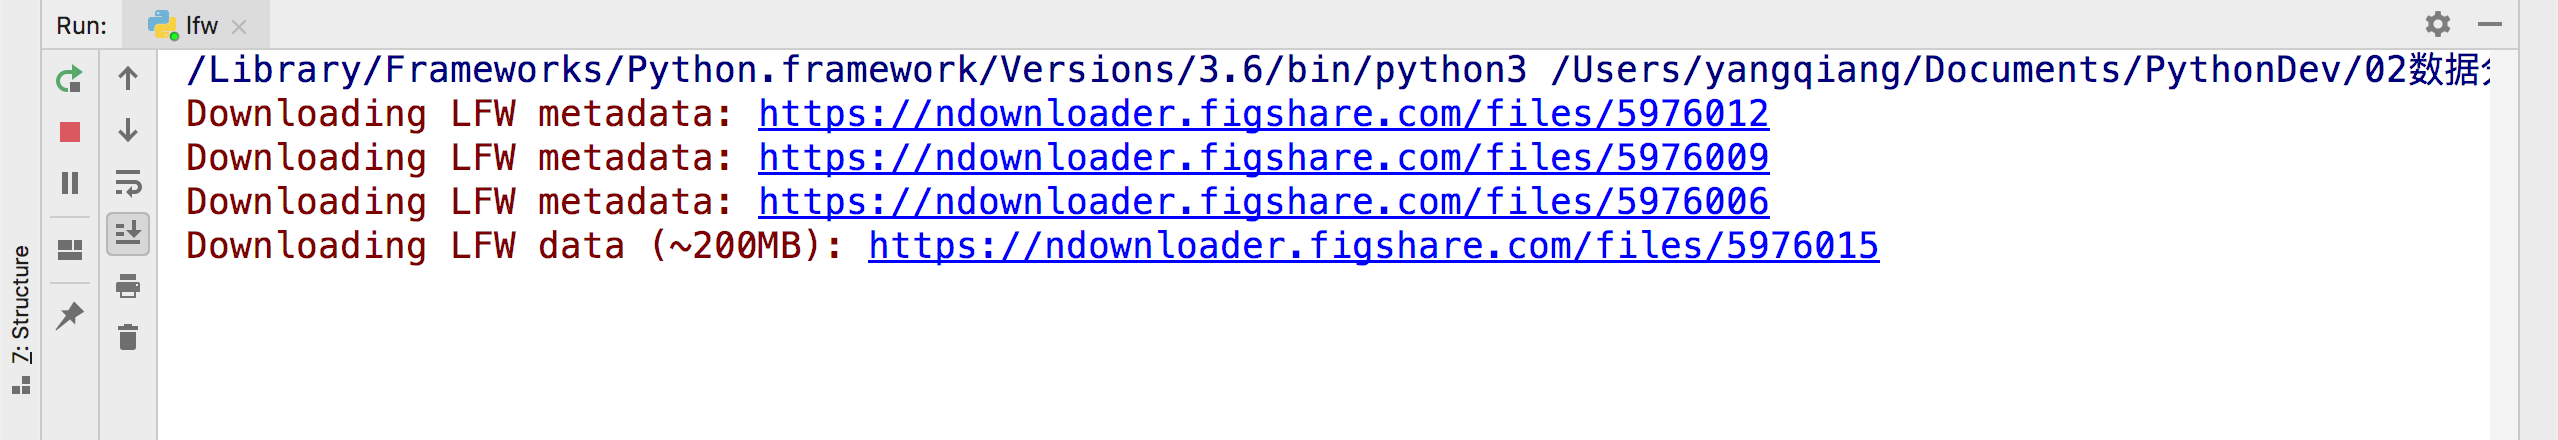

3. 加载的图像存放位置
    - 在Mac OS系统，存放位置为：\$HOME\$/scikit_learn_data/lfw_home/
    - 下载速度非常慢。

4. 加载sklearn的在线数据集在苹果系统中会出现SSL链接的问题，这个问题的解决可以使用Python自带的证书安装工具，安装证书后解决。
    - 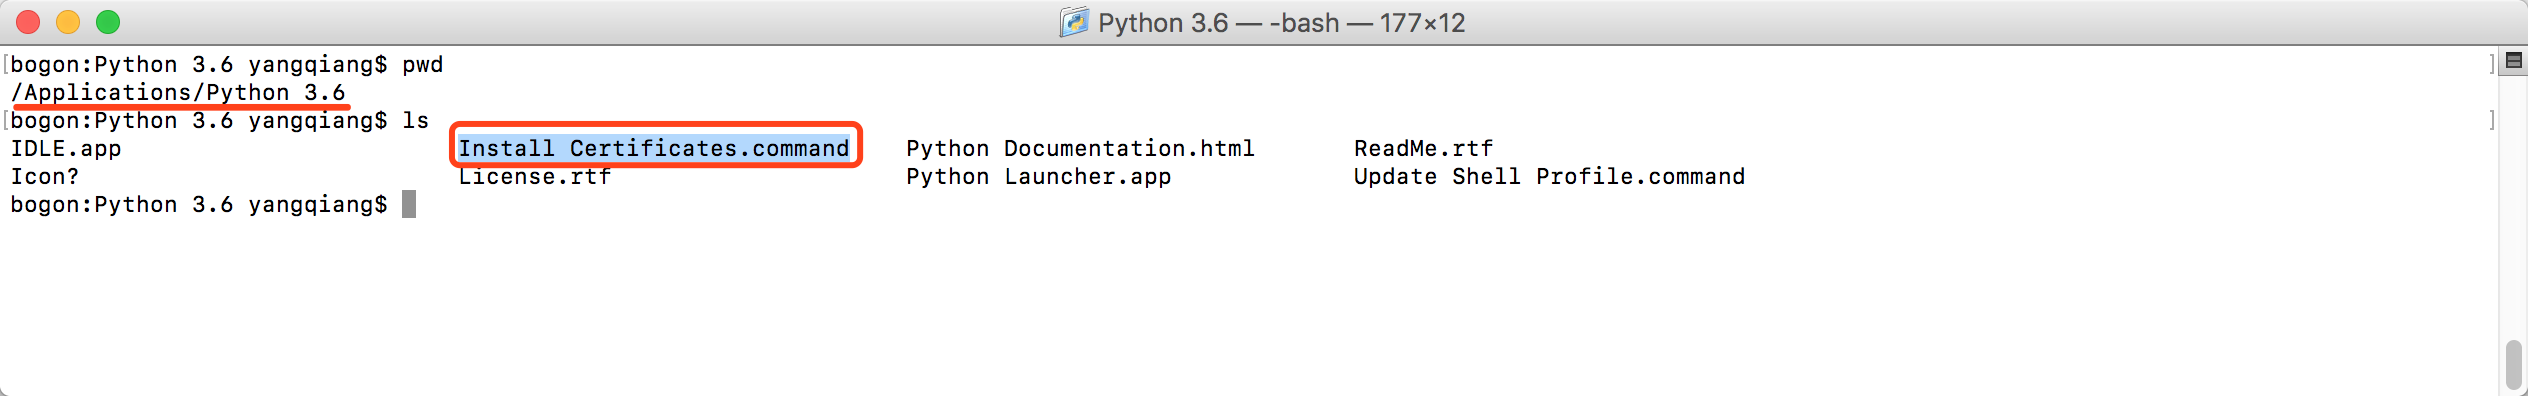


5. 安装过程如下：
    - 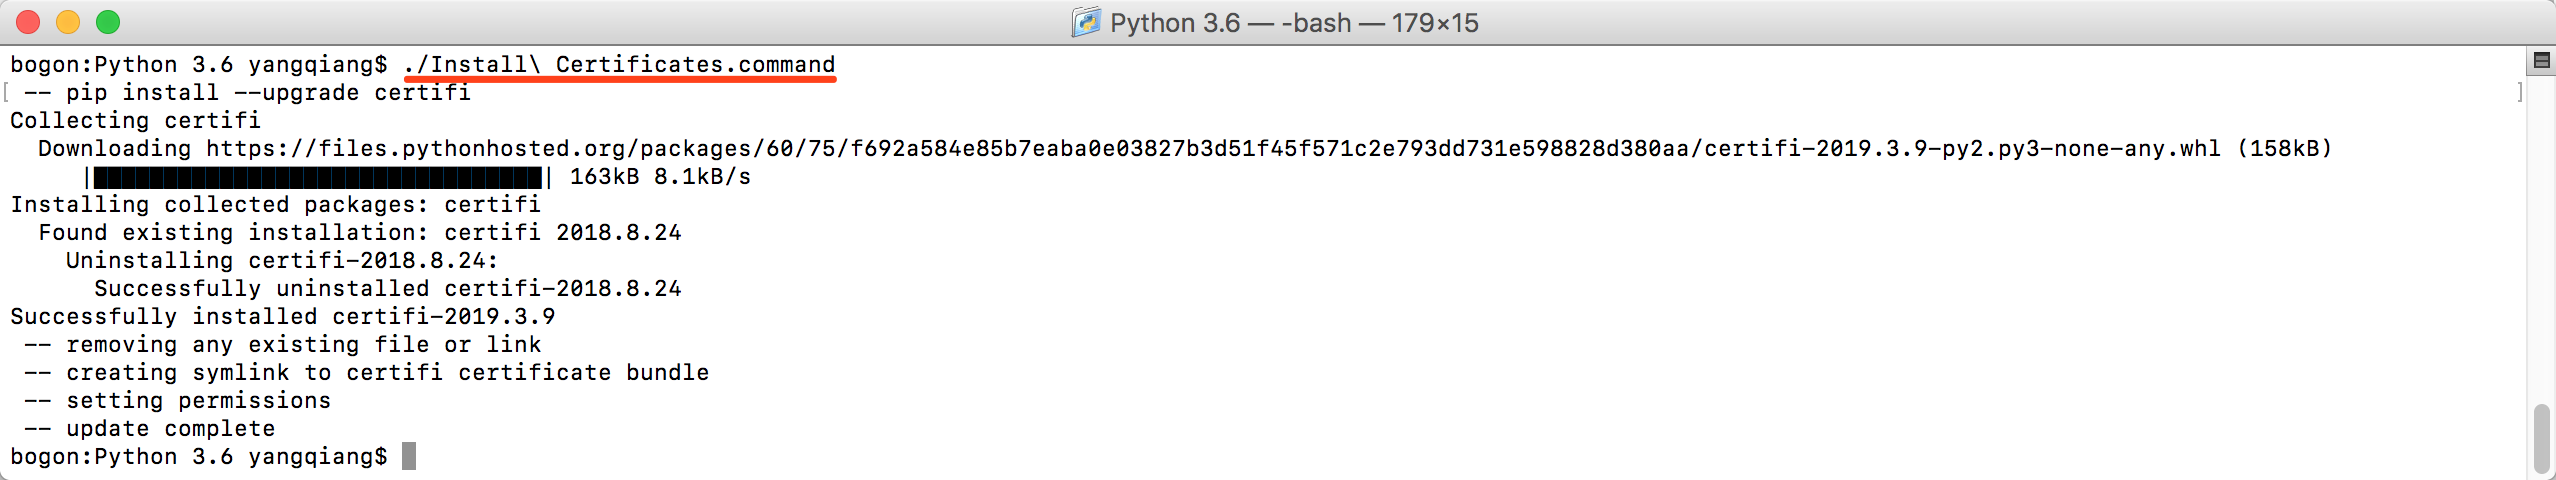

## 剑桥人脸库

1. 一个非常有名的人脸库。官网下载地址：
    - `https://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html`
    - 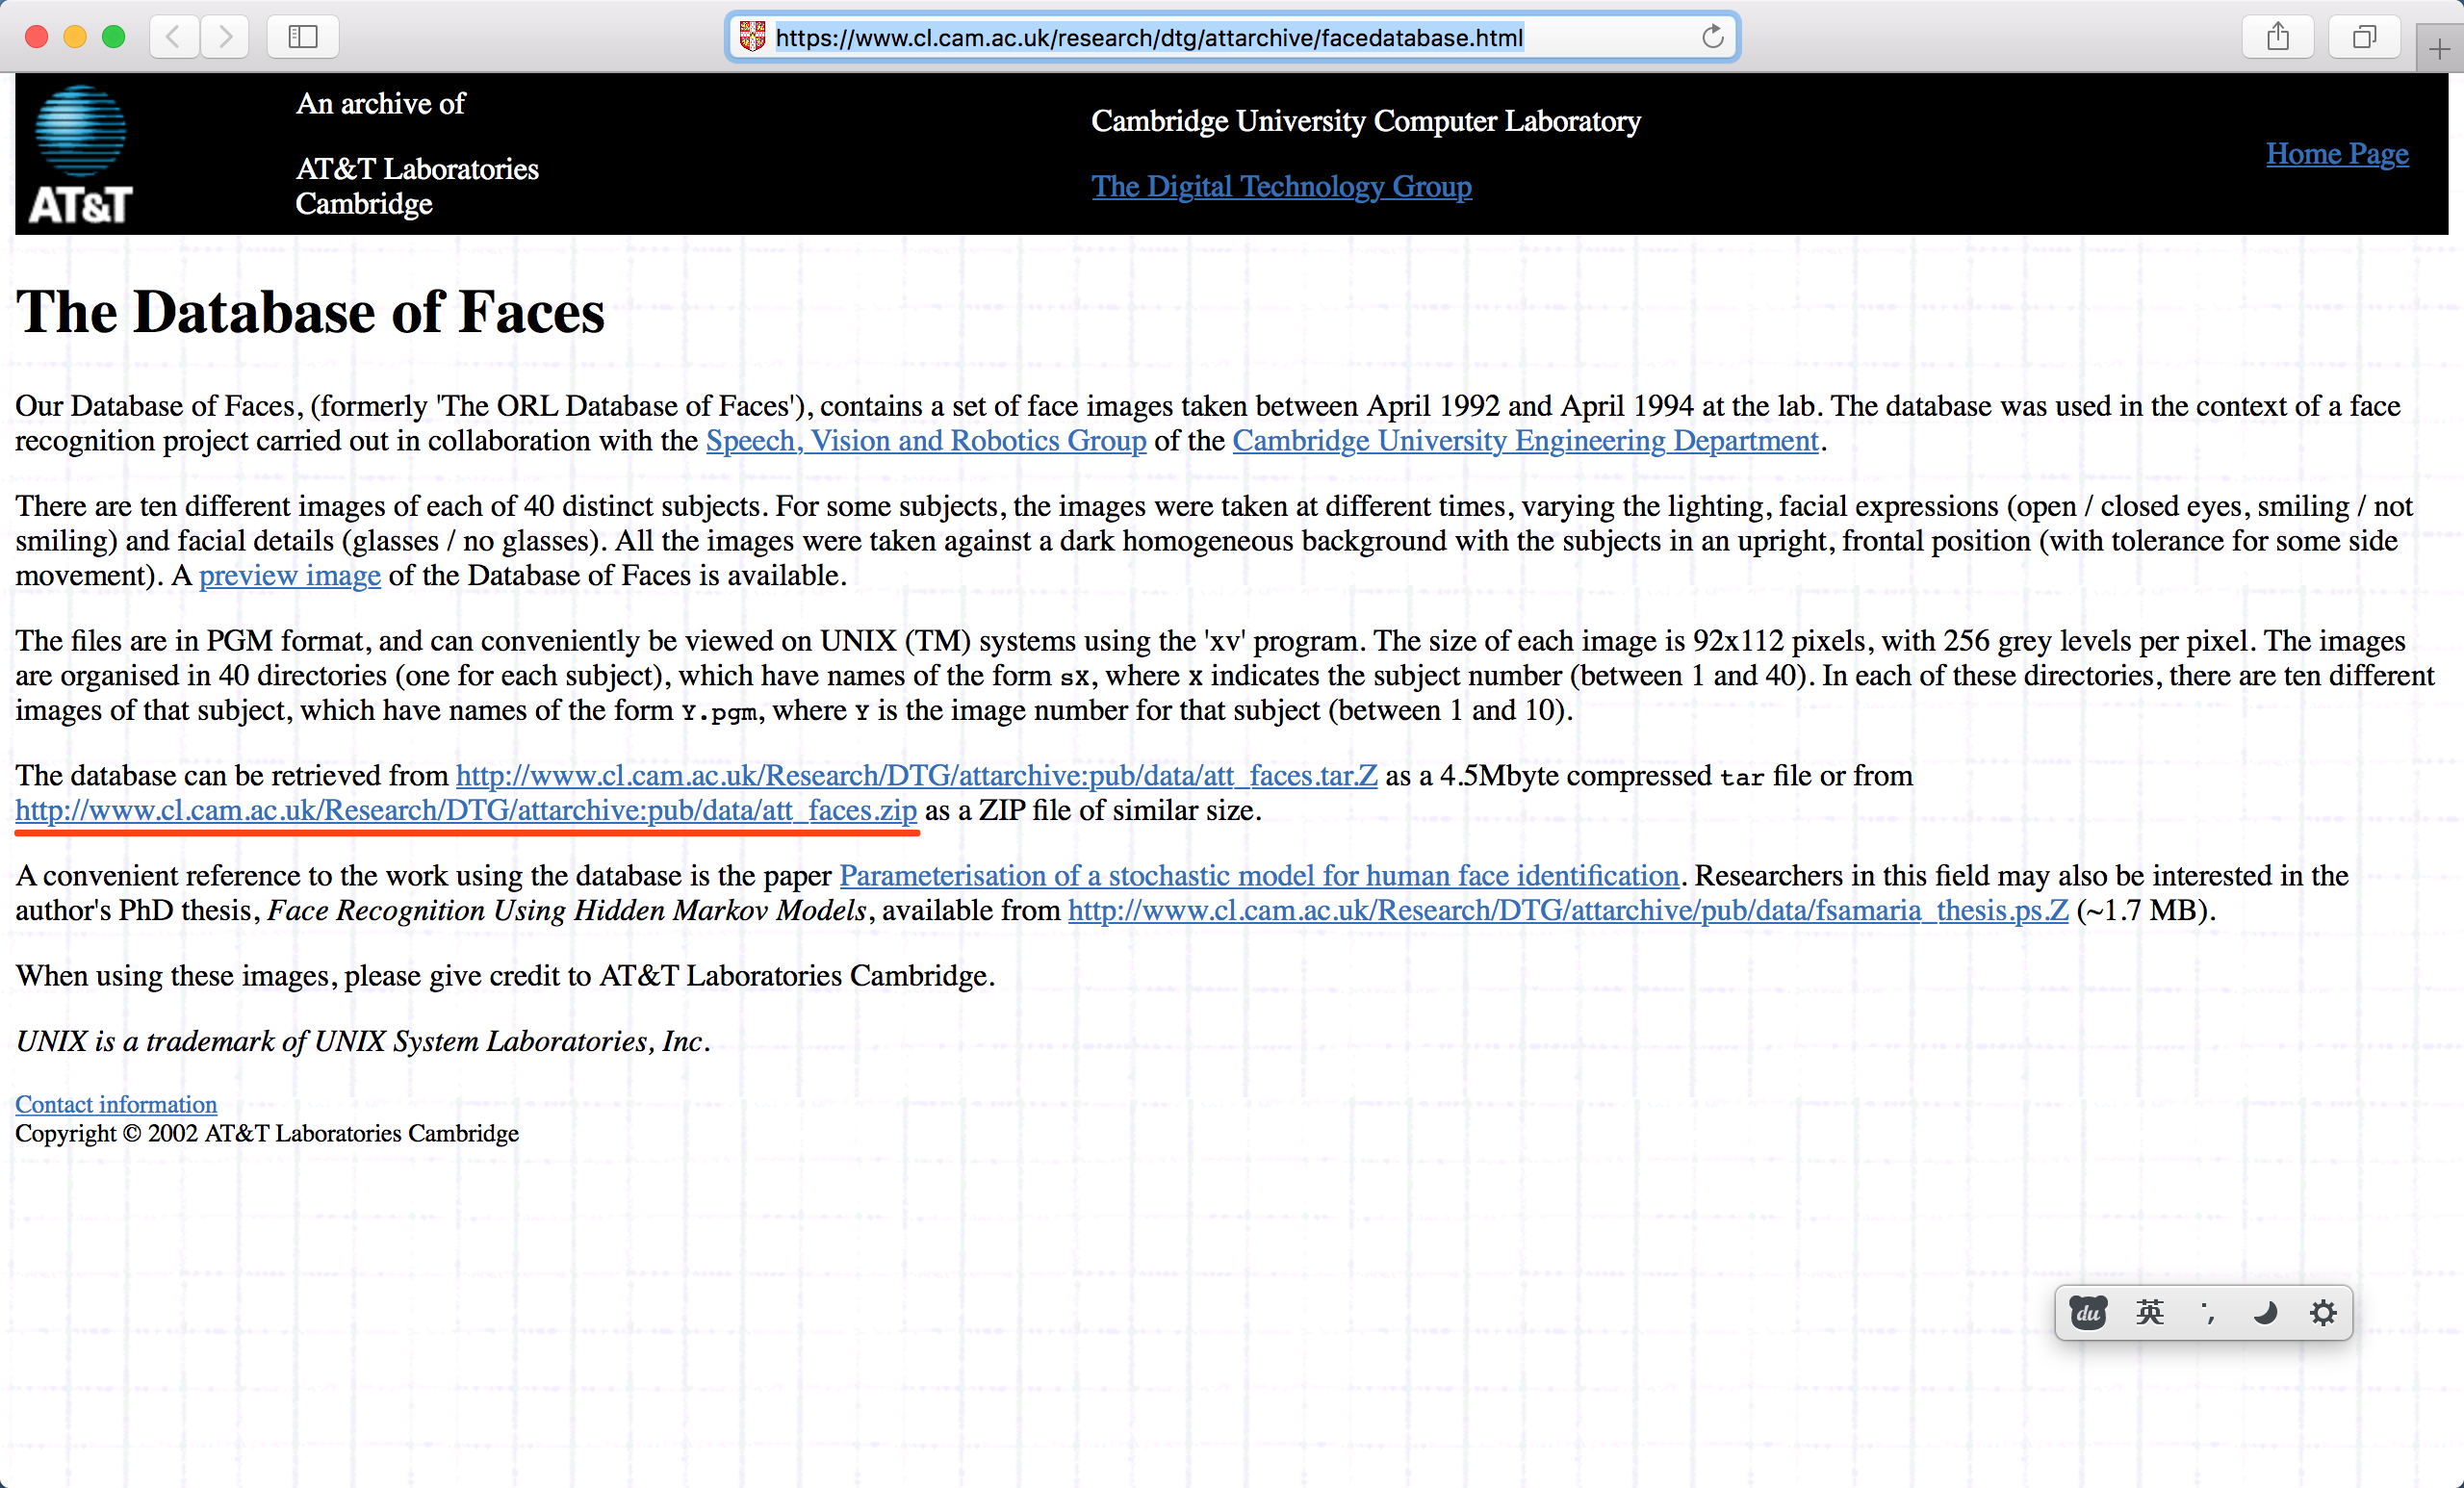

2. 下载后的图像信息：
    - 一共400张人脸图：40个人，每个人10张图像；
    - 每张人脸图$92 \times 112 $大小，256的灰度图像； 
    - 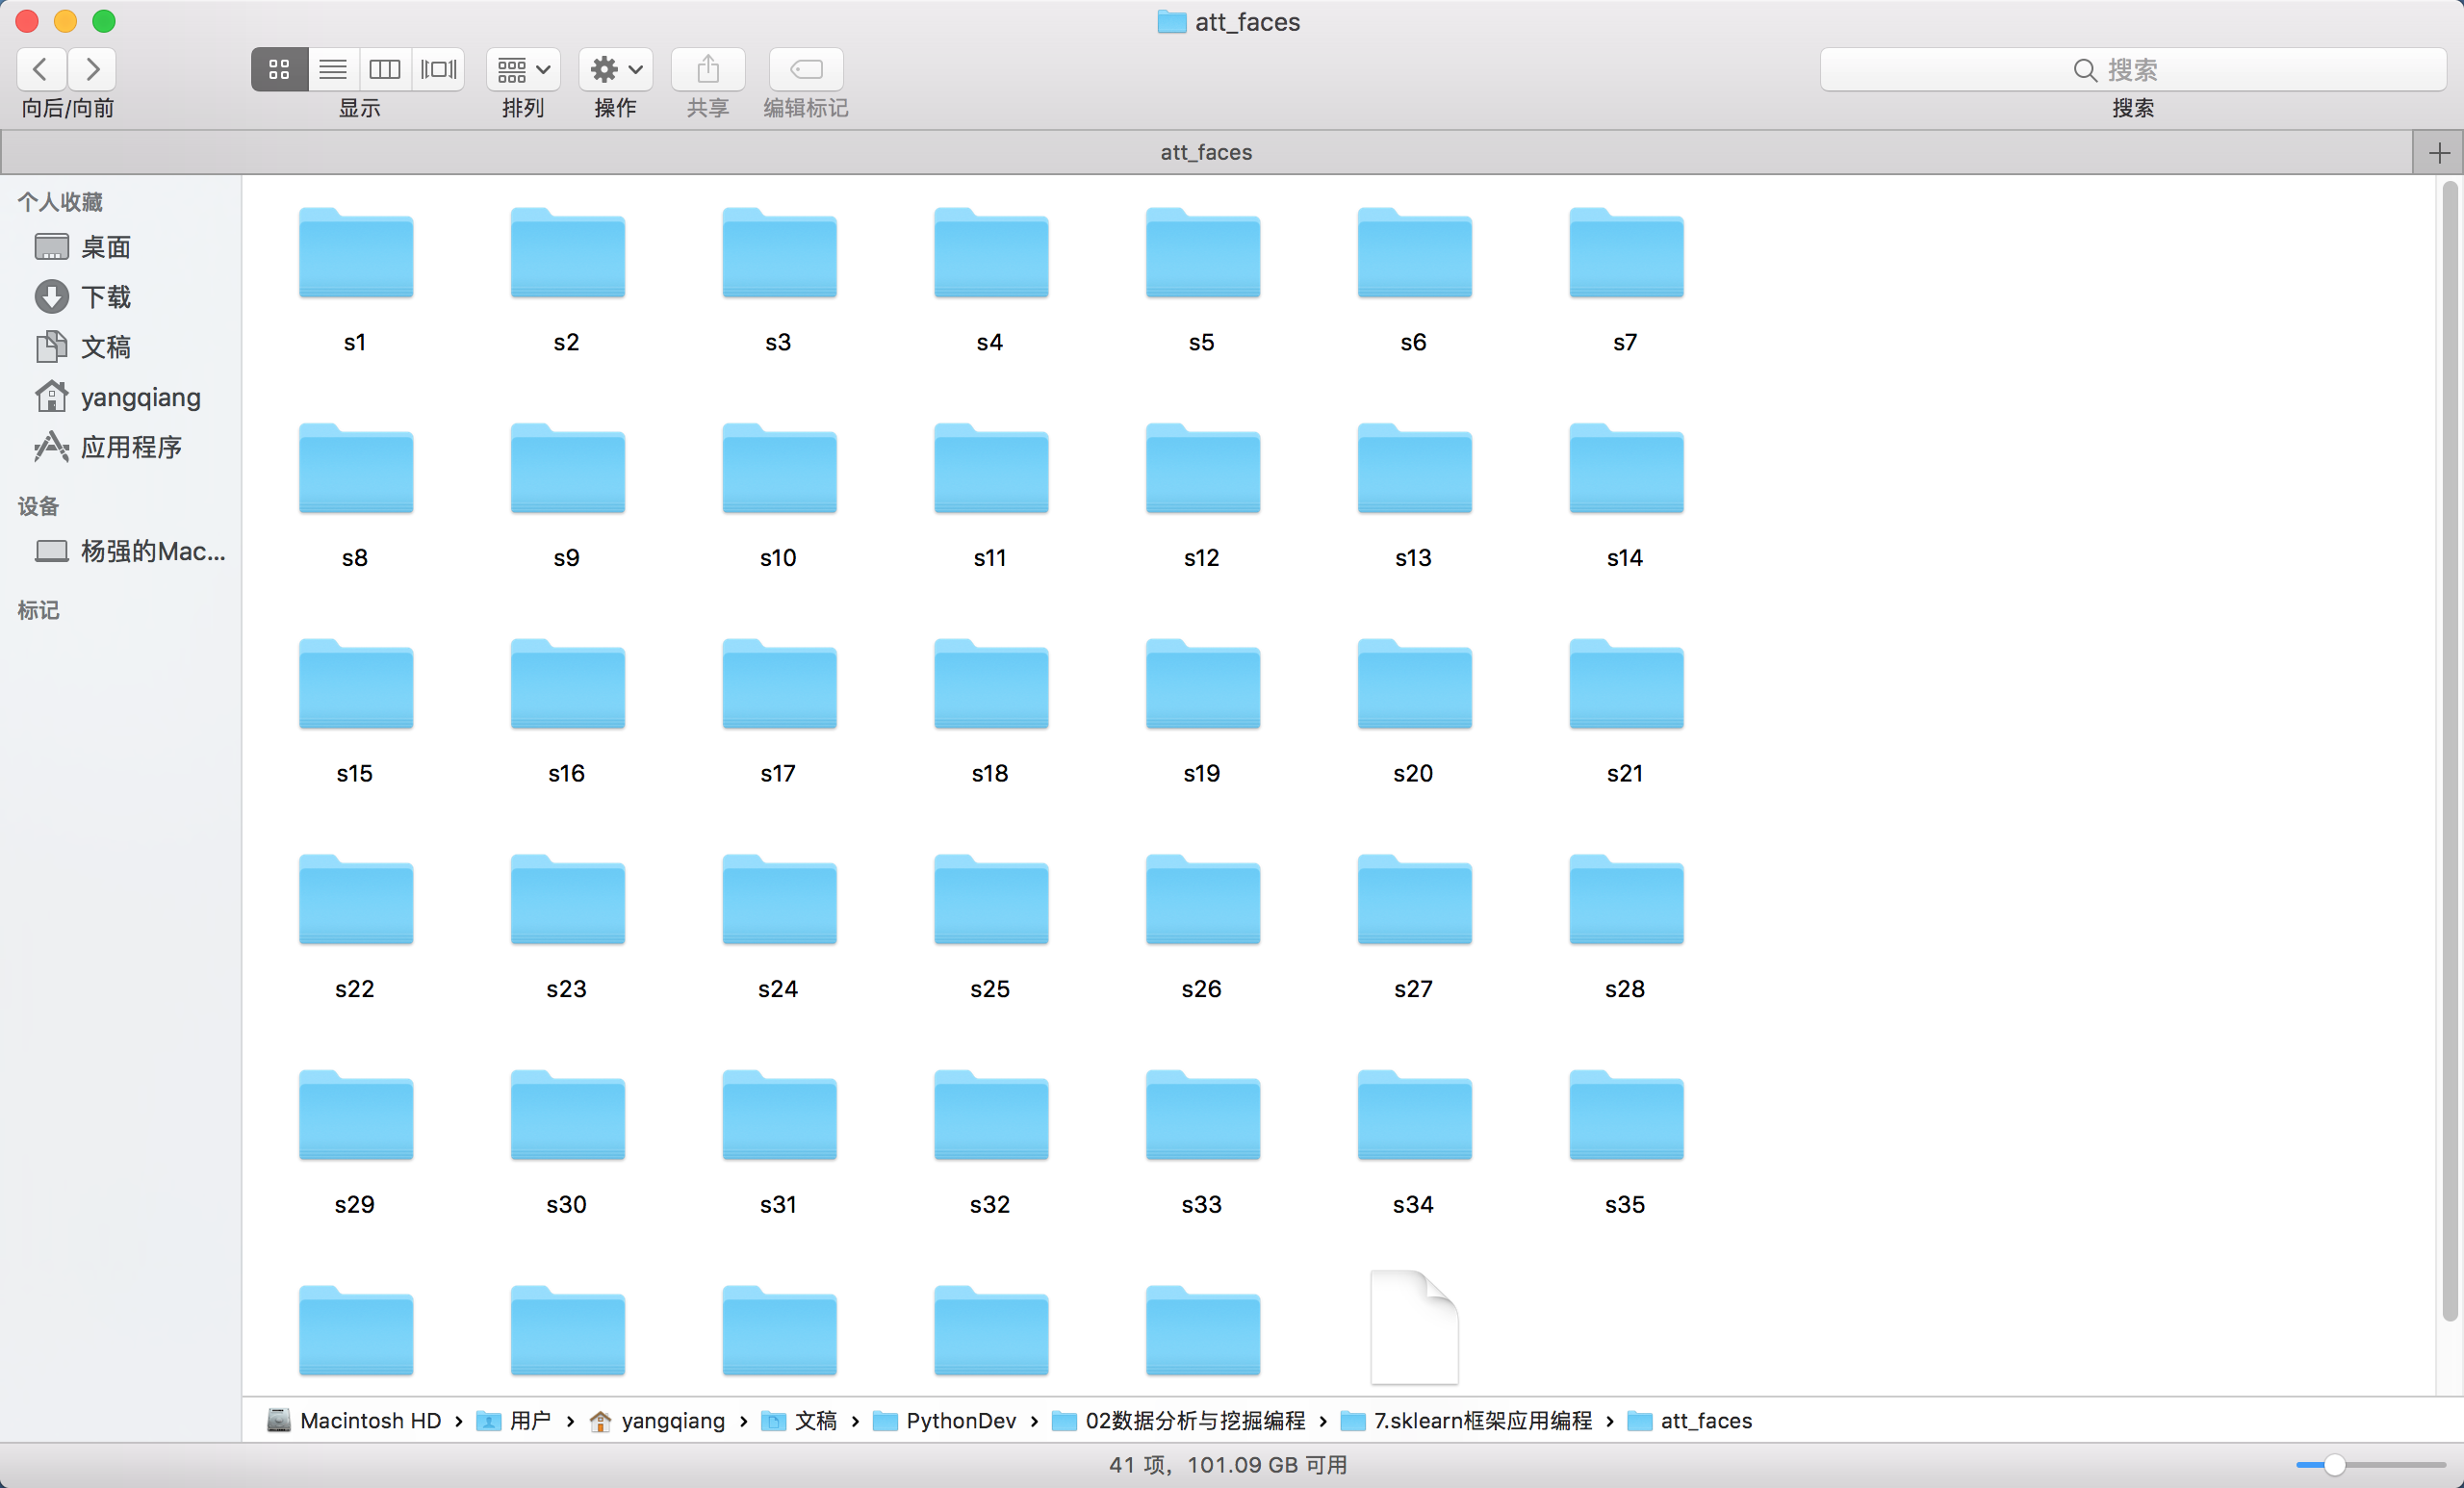

- 说明：
    - 为了下载方便，我们采用剑桥的人脸库。

# 人脸数据加载与加载格式

## 加载格式说明

- 人脸图像格式pgm格式：
    - 一种用于Unix平台的数据格式。

- 图像读取方法：
    - cv2模块读取
        - 返回三维图像，包含图像的颜色深度
    - matplotlib.pyplot模块读取
        - 返回二维或者三维数据，如果是灰度图，就范围二维，如果是彩色图就返回三维，包含颜色深度

In [17]:
import matplotlib.pyplot as plt
import cv2 
img_cv2 = cv2.imread('./att_faces/s1/1.pgm')
print(img_cv2.shape)
img_plt = plt.imread('timg-3.jpeg')
print(img_plt.shape)        
timg-3.jpeg

(112, 92, 3)
(400, 600, 3)


## 加载实现代码

1. matplotlib.pyplot实现

In [92]:
import matplotlib.pyplot as plt
import numpy as np
ONE_PERSON_FACE_NUM = 10
PERSON_NUM = 40
SAMPLES_NUM= ONE_PERSON_FACE_NUM * PERSON_NUM
IMAGE_W = 92
IMAGE_H = 112

def load_faces(face_path_):
    data_faces_ = np.zeros(shape=(SAMPLES_NUM, IMAGE_H*IMAGE_W), dtype=np.int32)
    label_faces_ = np.zeros(shape=(SAMPLES_NUM, 1), dtype=np.int32)
    idx = 0 
    for i in range(1, PERSON_NUM):    # 40个目录(s1- s40)存放40个人的人脸
        for j in range(1,ONE_PERSON_FACE_NUM + 1):   # 每个人一共10张人脸图像(1.pgm - 10.pgm)
            path_ = face_path_ + "/s" + str(i) + "/"+ str(j) + ".pgm"
            img_ = plt.imread(path_)
            data_faces_[idx, :] = img_.reshape(IMAGE_H*IMAGE_W)
            label_faces_[idx,:]= i
            idx += 1
    return data_faces_, label_faces_

data,target = load_faces('./att_faces')

In [93]:
# data.shape,target.shape

In [97]:
import cv2
import numpy as np
ONE_PERSON_FACE_NUM = 10
PERSON_NUM = 40
SAMPLES_NUM= ONE_PERSON_FACE_NUM * PERSON_NUM
IMAGE_W = 92
IMAGE_H = 112

def load_faces(face_path_):
    data_faces_ = np.zeros(shape=(SAMPLES_NUM, IMAGE_H*IMAGE_W), dtype=np.uint8)
    label_faces_ = np.zeros(shape=(SAMPLES_NUM, 1), dtype=np.uint8)
    idx = 0 
    for i in range(1, PERSON_NUM):    # 40个目录(s1- s40)存放40个人的人脸
        for j in range(1,ONE_PERSON_FACE_NUM + 1):   # 每个人一共10张人脸图像(1.pgm - 10.pgm)
            path_ = face_path_ + "/s" + str(i) + "/"+ str(j) + ".pgm"
            img_ = cv2.imread(path_)
            img_gray_ = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)
            data_faces_[idx, :] = img_gray_.reshape(IMAGE_H*IMAGE_W)
            label_faces_[idx,:]= i
            idx += 1
    return data_faces_, label_faces_

data,target = load_faces('./att_faces')

In [90]:
data.shape,target.shape

((400, 10304), (400, 1))

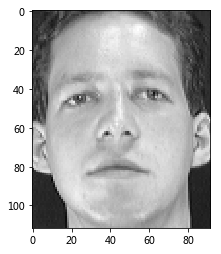

In [98]:
# 使用matplotlib显示
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(data[6].reshape((IMAGE_H, IMAGE_W)), cmap=plt.cm.gray)   # 可以改变颜色的调色板
plt.show()

# 数据交叉验证拆分

- 使用sklearn的交叉验证模块实现数据集的切分：
    - 训练集80%
    - 测试集20%

In [99]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=42)
data_train.shape, target_train.shape

((320, 10304), (320, 1))

# 数据预处理-降维

- 由于像特征比较多，一共10304个特征，建议降维处理。
- 降维的思想采用PCA方法。
- 降维的核心是保留多少特征，我们可以暂时保留20个。

## 降维训练

- 降维完毕我们做白化处理（规范化处理）
    - 设置whiten=True

In [100]:
from sklearn.decomposition import PCA
n_components = 20
pca = PCA(n_components=n_components,  whiten=True, svd_solver='randomized')
pca = pca.fit(data_train)


## 特征脸

- PCA训练就是奇异值分解，分解得到特征向量与特征值，
    - 特征值反应特征的差异性，越大特征与其他特征的差异越大，图像越可分。
    - 特征向量就是数据的特征空间，也是表示训练样本的所有人脸特征。
        - 显示特征脸，可以看出特征向量，保留了原来人脸的特征。

In [101]:
# 保留了与主要特征对应的特征向量。上面取值20个特征。
eigenfaces = pca.components_.reshape((n_components, IMAGE_H, IMAGE_W))
pca.components_[0]

array([-0.00516626, -0.00519973, -0.00516024, ...,  0.00238201,
        0.00192719,  0.00229558])

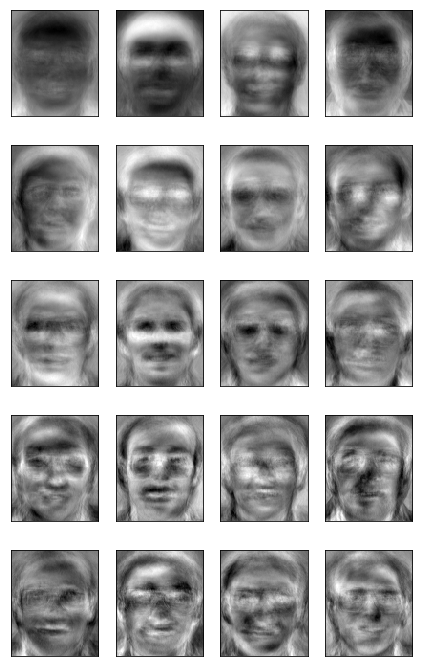

In [102]:
# 显示特征练
%matplotlib inline
import matplotlib.pyplot as plt

rows = 5
cols = 4
plt.figure(figsize=(1.8 * cols,  2.4 * rows))
for i in range(cols * rows):
    ax = plt.subplot(rows, cols, i + 1)
    plt.imshow(eigenfaces[i], cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())

plt.show()

## 人脸降维

- 可以看出任何人脸都可以使用这几个特征练表示，所以使用指定个数的特征，得到的人脸数据具有一定的可靠性。

In [103]:
pca_train = pca.transform(data_train)
pca_test = pca.transform(data_test)


# 使用sklearn的机器学习算法训练与测试

## 训练方法

In [105]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', C=1000, gamma=0.1)
classifier = classifier.fit(pca_train, target_train[:,0])

## 测试

In [117]:
# 注意：target_test被妖怪的设置成二维数组，需要做成1维比较。
pre = classifier.predict(pca_test)
correct_num=(pre == target_test[:,0]).sum()

print(F'''
识别正确数：{correct_num}，
测试样本数：{len(target_test)}，
正确率：{(100.0 * correct_num /len(target_test)): 5.2f}''')



识别正确数：78，
测试样本数：80，
正确率： 97.50


# 参数选择与交叉验证

## SVM的参数选择

- sklearn提供了SVM的参数选择
    - `sklearn.model_selection.GridSearchCV`

In [121]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [1000, 5000, 10000, 50000, 100000],
    'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
}

classifier = GridSearchCV(SVC(kernel='rbf'), param_grid, iid=True, cv=4) # iid与cv需要显式指定
classifier = classifier.fit(pca_train, target_train[:,0])
pre = classifier.predict(pca_test)
correct_num=(pre == target_test[:,0]).sum()

print(F'''
识别正确数：{correct_num}，
测试样本数：{len(target_test)}，
正确率：{(100.0 * correct_num /len(target_test)): 5.2f}''')


识别正确数：77，
测试样本数：80，
正确率： 96.25


## 数据降维的特征数选择

- 采用枚举的方式分析特征个数与识别率的关系

数据加载开始......
数据切分......
数据降维训练.......
数据降维......
不同特征数选取测试.....
数据可视化......


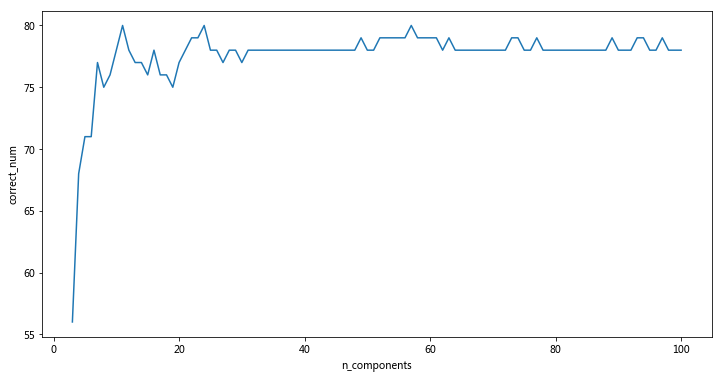

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# 全局变量
ONE_PERSON_FACE_NUM = 10
PERSON_NUM = 40
SAMPLES_NUM= ONE_PERSON_FACE_NUM * PERSON_NUM
IMAGE_W = 92
IMAGE_H = 112

# 图像数据加载
def load_faces(face_path_):
    data_faces_ = np.zeros(shape=(SAMPLES_NUM, IMAGE_H*IMAGE_W), dtype=np.int32)
    label_faces_ = np.zeros(shape=(SAMPLES_NUM, 1), dtype=np.int32)
    idx = 0 
    for i in range(1, PERSON_NUM):    # 40个目录(s1- s40)存放40个人的人脸
        for j in range(1,ONE_PERSON_FACE_NUM + 1):   # 每个人一共10张人脸图像(1.pgm - 10.pgm)
            path_ = face_path_ + "/s" + str(i) + "/"+ str(j) + ".pgm"
            img_ = plt.imread(path_)
            data_faces_[idx, :] = img_.reshape(IMAGE_H*IMAGE_W)
            label_faces_[idx,:]= i
            idx += 1
    return data_faces_, label_faces_
print('数据加载开始......')
data,target = load_faces('./att_faces')

# 数据切分
print('数据切分......')
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=42)

# 数据降维
print('数据降维训练.......')
from sklearn.decomposition import PCA
n_components = 20
pca = PCA(n_components=n_components,  whiten=True, svd_solver='randomized')
pca = pca.fit(data_train)
print('数据降维......')
pca_train = pca.transform(data_train)
pca_test = pca.transform(data_test)

# 选取合适的特征数测试
print('不同特征数选取测试.....')
result_rate = {}
for  n_components in range(3, 100+1):
    # 降维训练
    pca = PCA(n_components=n_components,  whiten=True, svd_solver='randomized')
    pca = pca.fit(data_train)
    # 数据降维
    pca_train = pca.transform(data_train)
    pca_test = pca.transform(data_test)
    # 对降维的数据进行学习训练
    param_grid = {
        'C': [1000, 5000, 10000, 50000, 100000],
        'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
    }

    classifier = GridSearchCV(SVC(kernel='rbf'), param_grid, iid=True, cv=4) # iid与cv需要显式指定
    classifier = classifier.fit(pca_train, target_train[:,0])
    pre = classifier.predict(pca_test)
    correct_num=(pre == target_test[:,0]).sum()
    #print(n_components, ':', correct_num)
    result_rate[n_components] = correct_num
    

# 数据可视化
print('数据可视化......')
data_rate = pd.DataFrame(data={
    'n_components': list(result_rate.keys()),
    'correct_num': list(result_rate.values())
})

ax = sns.lineplot(data=data_rate, x='n_components', y='correct_num')
ax.figure.set_size_inches((12, 6))
plt.show()

In [5]:
# 根据上面图形，基本上可以评估出性价比最佳特征数10的样子，这样可以提升速度，并且得到较好的识别率。
# 选择svc最优参数是：
classifier.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
# 降维
pca = PCA(n_components=10,  whiten=True, svd_solver='randomized')
pca = pca.fit(data_train)

# 数据降维
pca_train = pca.transform(data_train)
pca_test = pca.transform(data_test)

# 分类
best_classifier = SVC(kernel='rbf', C=1000, gamma=0.001)
best_classifier = best_classifier.fit(pca_train, target_train[:,0])
pre = best_classifier.predict(pca_test)
correct_num=(pre == target_test[:,0]).sum()
print(pre.shape)
correct_num


(80,)


78

# 模型评估

## 分类报告

- `metrics.classification_report`

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
cls_report = classification_report(target_test[:,0], pre)
print(cls_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.67      0.80         3
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         3
          16       0.67      1.00      0.80         2
          18       1.00      1.00      1.00         3
          19       1.00    

## 混淆矩阵

- `metrics.confusion_matrix`

In [21]:
con_matrix = confusion_matrix(target_test[:,0], pre)
print(con_matrix.shape)
print(con_matrix)

(36, 36)
[[4 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 4]]
